# Visualización en Python

### Título Proyecto: "Generación de intervalo de confianzadel 95%  para el logro de un porcentaje al menos de 70% de ocurrencia del evento  resultado L (gana el local)"

### Autor: Ervar Luis Molina

## DDL

### Carga de librerias, módulos y montaje de dateset desde Google Drive

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount ('/content/gdrive')
import os


Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/MyDrive/Data Science/Data sets'
datos= pd.read_excel('afa_2015_2022_spa_mod.xlsx')
datos.head(6)
print(f'La dimensión de este dataframe es: {datos.shape}')

/content/gdrive/MyDrive/Data Science/Data sets
La dimensión de este dataframe es: (1513, 34)


### Transformación externa

Lo primera modificación al dataset original se realizó de manera externa a google.colab  y se eliminó una serie de más de 1000 filas, con atributos vacios,  porque superaban ampliamente los protocolos de buenas practicas para la utilización estadística de los datos. Esto se realizo con Excel y se transformó la extensión .csv a .xlsx, que es el utilizado para este proyecto.

In [4]:
# Convierto la columna fecha_encuentro en tipo datetime para luego poder dividirla
datos['fecha_encuentro']= pd.to_datetime(datos['fecha_encuentro'])
# Divido en mes y año
datos['Mes'] = datos['fecha_encuentro'].dt.month
datos['Año'] = datos['fecha_encuentro'].dt.year
# Elimino columna 'fecha_encuentro', perdió su utilidad,  los datos siguen presentes
#datos=datos.drop('fecha_encuentro', axis=1)

### Información sobre los datos

In [5]:
datos.head(5)

,torneo,fecha,partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local,tiros_arco_local,intentos_local,...,altura_media_visitante,edad_media_visitante,proporcion_zurdos_visitante,resultado,fecha_encuentro,apuesta_local,apuesta_visitante,apuesta_empate,Mes,Año
0,Campeonato 2017/18,13,1,Godoy Cruz,Chacarita,1,0,46.0,2.0,9.0,...,1.769412e+16,2.436842e+15,0.210526,L,2018-01-26 19:00:00,1.76,4.88,3.42,1.0,2018.0
1,Campeonato 2017/18,13,2,Tigre,Banfield,1,2,65.0,3.0,15.0,...,1.793750e+05,2.437500e+04,0.175000,V,2018-01-26 19:00:00,2.36,3.18,3.08,1.0,2018.0
2,Campeonato 2017/18,13,3,Talleres (C),San Lorenzo,2,0,54.0,5.0,11.0,...,1.783778e+16,2.588889e+15,0.288889,L,2018-01-26 21:15:00,2.16,3.58,3.06,1.0,2018.0
3,Campeonato 2017/18,13,4,Lanus,Patronato,1,1,64.0,3.0,4.0,...,1.793953e+16,2.767442e+16,0.139535,E,2018-01-27 19:15:00,1.74,5.13,3.36,1.0,2018.0
4,Campeonato 2017/18,13,5,Newells,Arsenal,2,1,57.0,7.0,18.0,...,1.775556e+16,2.414634e+16,0.341463,L,2018-01-27 17:00:00,1.82,4.54,3.33,1.0,2018.0


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   torneo                       1513 non-null   object        
 1   fecha                        1513 non-null   int64         
 2   partido                      1513 non-null   int64         
 3   equipo_local                 1513 non-null   object        
 4   equipo_visitante             1513 non-null   object        
 5   goles_local                  1513 non-null   int64         
 6   goles_visitante              1513 non-null   int64         
 7   posesion_local               1494 non-null   float64       
 8   tiros_arco_local             1494 non-null   float64       
 9   intentos_local               1494 non-null   float64       
 10  faltas_local                 1494 non-null   float64       
 11  tiro_esquina_local           1494 non-null 

In [ ]:
datos.describe()

,fecha,partido,goles_local,goles_visitante,posesion_local,tiros_arco_local,intentos_local,faltas_local,tiro_esquina_local,posesion_visitante,...,proporcion_zurdos_local,valor_mercado_visitante,altura_media_visitante,edad_media_visitante,proporcion_zurdos_visitante,apuesta_local,apuesta_visitante,apuesta_empate,Mes,Año
count,1513.000000,1513.000000,1513.000000,1513.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,...,1513.000000,1.513000e+03,1.513000e+03,1.513000e+03,1513.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,14.042300,7.098480,1.290813,0.989425,51.115797,4.423695,13.668005,13.337349,5.389558,48.884203,...,0.224840,1.613890e+15,1.419610e+16,1.588670e+16,0.225230,2.466104,3.869127,3.302447,7.212302,2019.971561
std,7.367493,3.822823,1.122180,1.038871,10.789869,2.229138,4.734712,4.012704,2.833074,10.789869,...,0.051659,7.612609e+15,6.975934e+15,1.165344e+16,0.051767,0.906171,1.878297,0.518345,3.195469,1.574906
min,1.000000,1.000000,0.000000,0.000000,21.000000,0.000000,1.000000,3.000000,0.000000,18.000000,...,0.113636,7.950000e+00,1.780000e+00,2.400000e+01,0.113636,1.150000,1.260000,2.600000,1.000000,2018.000000
25%,8.000000,4.000000,0.000000,0.000000,43.000000,3.000000,10.000000,10.000000,3.000000,41.000000,...,0.183673,2.660000e+01,1.767727e+16,2.493617e+15,0.183673,1.890000,2.680000,3.000000,4.000000,2018.000000
50%,15.000000,7.000000,1.000000,1.000000,51.000000,4.000000,13.000000,13.000000,5.000000,49.000000,...,0.230769,1.177500e+04,1.785556e+16,2.395652e+16,0.230769,2.280000,3.385000,3.150000,8.000000,2020.000000
75%,20.000000,10.000000,2.000000,2.000000,59.000000,6.000000,17.000000,16.000000,7.000000,57.000000,...,0.260870,4.482500e+04,1.793667e+16,2.536735e+16,0.260870,2.830000,4.422500,3.400000,10.000000,2021.000000
max,27.000000,14.000000,8.000000,6.000000,82.000000,13.000000,31.000000,27.000000,16.000000,79.000000,...,0.365385,4.992500e+16,1.817778e+16,2.852381e+16,0.365385,11.250000,17.660000,7.670000,12.000000,2022.000000


In [ ]:
datos['equipo_local'].info()
datos['equipo_local'].describe()

distintos_equipos_locales = datos['equipo_local'].unique()
print(distintos_equipos_locales)


<class 'pandas.core.series.Series'>
RangeIndex: 1513 entries, 0 to 1512
Series name: equipo_local
Non-Null Count  Dtype 
--------------  ----- 
1513 non-null   object
dtypes: object(1)
memory usage: 11.9+ KB
['Godoy Cruz' 'Tigre' 'Talleres (C)' 'Lanus' 'Newells' 'Def y Justicia'
 'Boca Juniors' 'Argentinos' 'Olimpo' 'Union' 'Huracan' 'Independiente'
 'Atl Tucuman' 'Gimnasia (LP)' 'Patronato' 'Belgrano' 'Banfield'
 'Rosario Central' 'Colon' 'River Plate' 'Arsenal' 'Estudiantes (LP)'
 'San Lorenzo' 'Racing Club' 'Chacarita' 'Temperley' 'San Martin (SJ)'
 'Velez' 'Aldosivi' 'San Martin (T)' 'Central Cba (SdE)' 'Sarmiento (J)'
 'Platense' 'Barracas Central']


# Graficos con libreria Matplotlib y sus módulos

In [ ]:
# Set estilo
plt.style.use('dark_background')


## Gráfico 1
### Frecuencia de cantidad de goles en un partido de futbol. Relacionado con todos los partidos de local que fueron disputados por cada equipo del torneo de Primera Division AFA entre 2018 y 2022 y la cantidad de goles convertidos.


In [ ]:
# Elijo variables para asignarle atributos para graficar
frec_goles=datos.goles_local.value_counts()
frec_goles.sort_values

In [ ]:
# Frecuencia de goles del local en partidos totales
dib, ax = plt.subplots(figsize=( 10,5) )
ax.bar( frec_goles.index, frec_goles)


## Gráfico 2
### Distribución de resultados en lo partidos totales en el periodo analizado

In [ ]:
# Relacion partidos ganados por equipo local vs visitante
resul_part= datos.resultado.value_counts()
resul_part


In [ ]:
#preparamos variables y creamos una serie para utilizar grafico de tortas
dib, ax= plt.subplots(figsize=(10,7))
ax.pie(resul_part , labels= resul_part.index,autopct='%1.1f%%', startangle=90, textprops={'color':'black'})
ax.axis('equal')
ax.legend(resul_part.index, title="Resultado Partido", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show


In [ ]:
#por ahora este script no lo voy a utilizar
"""#Cantida de Tarjetas rojas a traves de los años segun equipo local o visitante
#defino variables

roja_local= datos.rojas_local.value_counts()
roja_vis= datos.rojas_visitante.value_counts()
print(roja_local, roja_vis)
#saco los partidos sin roja , podria redefinirla y no crear otra..
roja_local1= roja_local.loc[roja_local.index > 0]
roja_local1
roja_vis1= roja_vis.loc[roja_local.index > 0]
roja_local1, roja_vis1"""

## Gráfico 3
### Dos gráficos para analizar la relación entre la  cantidad de goles por partido durante el periodo de análisis, comparando entre partidos de local y visitante.

In [ ]:
#Cantidad de goles por partido totales, local o visitante
#defino variables
año21 = datos.query("Año == 2021" )
dib, ax = plt.subplots(1,2,figsize=(12, 3))
ax[0].hist(datos['goles_local'],bins=5)
ax[1].hist(datos['goles_visitante'],bins=7)





plt.show


# Visualización con libreria Seaborn


## Gráfico 1
### Porcentaje de posesión de la pelota en los partidos y su relación con el resultado final del, segun la frecuencia de partidos

<Axes: xlabel='posesion_local', ylabel='Count'>

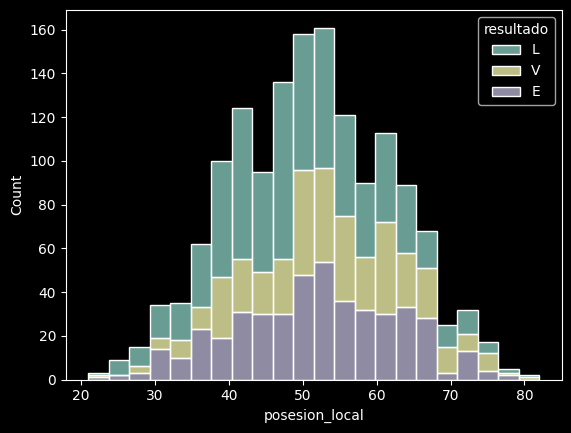

In [ ]:
#frecuencia resulados partidos por año
sns.histplot(data=datos, x='posesion_local', hue="resultado", multiple="stack")

In [ ]:
#por ahora este script no lo voy a utilizar
"""#goles_lineat= datos.drop_duplicates(subset=['torneo','equipo_local', 'goles_local'])

goles3=datos[ datos['equipo_local']== 'Boca Juniors']
goles_lineat_sin_duplicados = goles3.drop_duplicates(subset=['Año'])
resultado_pivot = goles_lineat_sin_duplicados.pivot(index='Año',columns='equipo_local' ,values='goles_local')
sns.lineplot(data=resultado_pivot)"""

"#goles_lineat= datos.drop_duplicates(subset=['torneo','equipo_local', 'goles_local'])\n\ngoles3=datos[ datos['equipo_local']== 'Boca Juniors']\ngoles_lineat_sin_duplicados = goles3.drop_duplicates(subset=['Año'])\nresultado_pivot = goles_lineat_sin_duplicados.pivot(index='Año',columns='equipo_local' ,values='goles_local')\nsns.lineplot(data=resultado_pivot)"

## Gráfico 2
### Dispersión porcentaje de posesión del equipo local y su relacion con la cantidad de futbolistas que tienen su pierna izquierda como la mas habil para jugar

<ipython-input-18-029b0765d974>:8: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  g = sns.relplot(


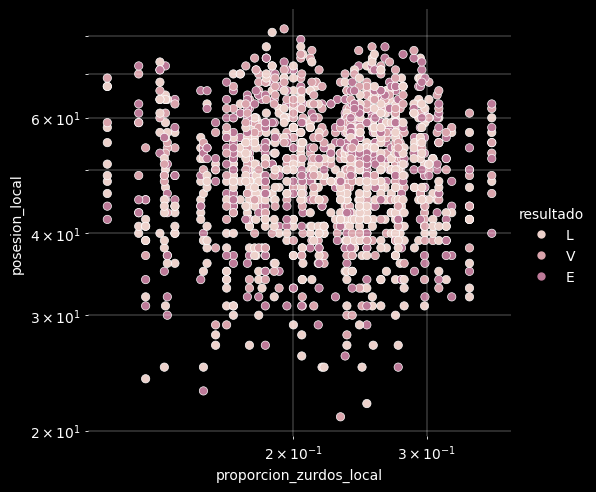

In [ ]:
"""
ganalocal=datos[datos['resultado']=='L']
sns.scatterplot(data=ganalocal, x="proporcion_zurdos_local", y='posesion_local')
"""


grafico2 = sns.cubehelix_palette()
g = sns.relplot(
    data=datos,
    x="proporcion_zurdos_local", y="posesion_local",
    hue="resultado",
    palette=grafico2, sizes=(10, 200),
)

g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

plt.show()

## Gráfico 3
### Visualización de outoliers para corroborar la aproximación de los datos entre si, y predecir el bajo desvio de estos en la relación cantidad de faltas y cantidad de tarjetas rojas

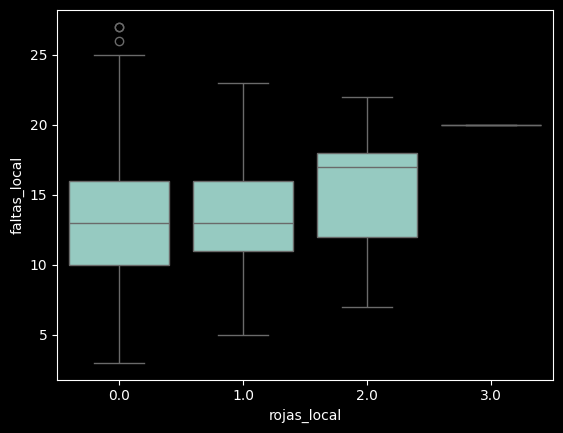

In [ ]:
grafico3 = sns.boxplot(datos, x='rojas_local', y='faltas_local') #ni chatgpt sabia como arrglar  el order=[]en el eje x por la cantidad de decimales q tenia
plt.show()

In [ ]:
"""datos_filtrados = datos[(datos['resultado'] == 'L') & (datos['equipo_local'] =='Boca Juniors')]
graf = sns.boxplot(datos_filtrados.round(2), x='rojas_local', y='posesion_local') #ni chatgpt sabia como arrglar  el order=[]en el eje x por la cantidad """

"datos_filtrados = datos[(datos['resultado'] == 'L') & (datos['equipo_local'] =='Boca Juniors')]\ngraf = sns.boxplot(datos_filtrados.round(2), x='rojas_local', y='posesion_local') #ni chatgpt sabia como arrglar  el order=[]en el eje x por la cantidad "